# Importing Packages

In [1]:
# Importing the required libraries...

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supress Warnings...

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
# Loading the data into dataframe...

df = pd.read_csv(r"C:\Users\sneha\Downloads\Housing (1).csv")

In [3]:
# Making a copy of orignal dataset...

housing_orignal = df.copy()

# Data Exploration:

In [4]:
# Check the shape of the Dataset...

df.shape

(545, 13)

In [5]:
# Looking the data...

df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# View the number of rows and columns...

print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 545 rows
The dataset has 13 columns


In [7]:
# Display concise summary of DataFrame using info()...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
# Checking for missing values...

df.isnull().sum().any()

False

In [9]:
# Statistical Summary...

df.describe().apply(lambda x: x.apply('{0:.4f}'.format))

,price,area,bedrooms,bathrooms,stories,parking
count,545.0000,545.0000,545.0000,545.0000,545.0000,545.0000
mean,4766729.2477,5150.5413,2.9651,1.2862,1.8055,0.6936
std,1870439.6157,2170.1410,0.7381,0.5025,0.8675,0.8616
min,1750000.0000,1650.0000,1.0000,1.0000,1.0000,0.0000
25%,3430000.0000,3600.0000,2.0000,1.0000,1.0000,0.0000
50%,4340000.0000,4600.0000,3.0000,1.0000,2.0000,0.0000
75%,5740000.0000,6360.0000,3.0000,2.0000,2.0000,1.0000
max,13300000.0000,16200.0000,6.0000,4.0000,4.0000,3.0000


In [10]:
# Change the data type of categorical columns from object to category...

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [11]:
# Collect all numerical and categorical columns...

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

In [12]:
# Checking categorical columns for any discrepancy...

for col in categorical_columns:
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for column mainroad:
yes    468
no      77
Name: mainroad, dtype: int64
----------------------------------------
Value counts for column guestroom:
no     448
yes     97
Name: guestroom, dtype: int64
----------------------------------------
Value counts for column basement:
no     354
yes    191
Name: basement, dtype: int64
----------------------------------------
Value counts for column hotwaterheating:
no     520
yes     25
Name: hotwaterheating, dtype: int64
----------------------------------------
Value counts for column airconditioning:
no     373
yes    172
Name: airconditioning, dtype: int64
----------------------------------------
Value counts for column prefarea:
no     417
yes    128
Name: prefarea, dtype: int64
----------------------------------------
Value counts for column furnishingstatus:
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64
----------------------------------------


# Exploratory Data Analysis
 Univariate Analysis

 Target Feature -- Price 

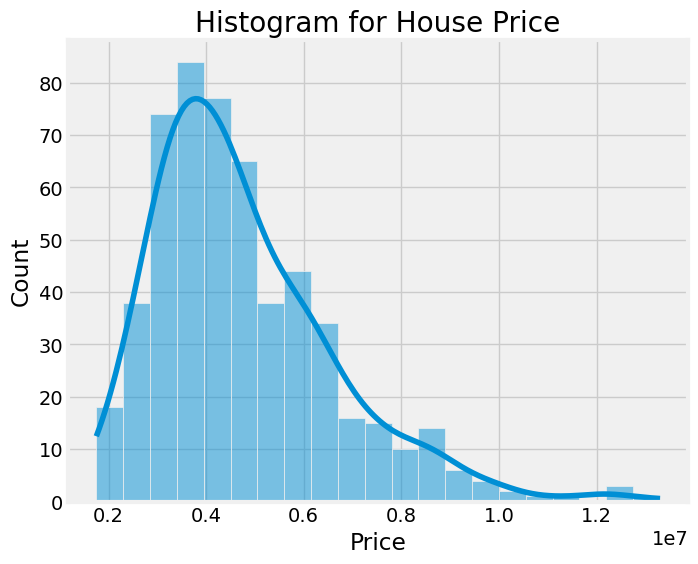

In [13]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')

sns.histplot(df['price'], kde=True)

plt.xlabel('Price')
plt.title('Histogram for House Price')
plt.show()

In [14]:
# Calculating the Skweness...

df['price'].skew()

1.2122388370279802

In [15]:
# In order to make Price column normally distributed we apply Logarithm transformation...

df['price'] = np.log1p(df['price'])

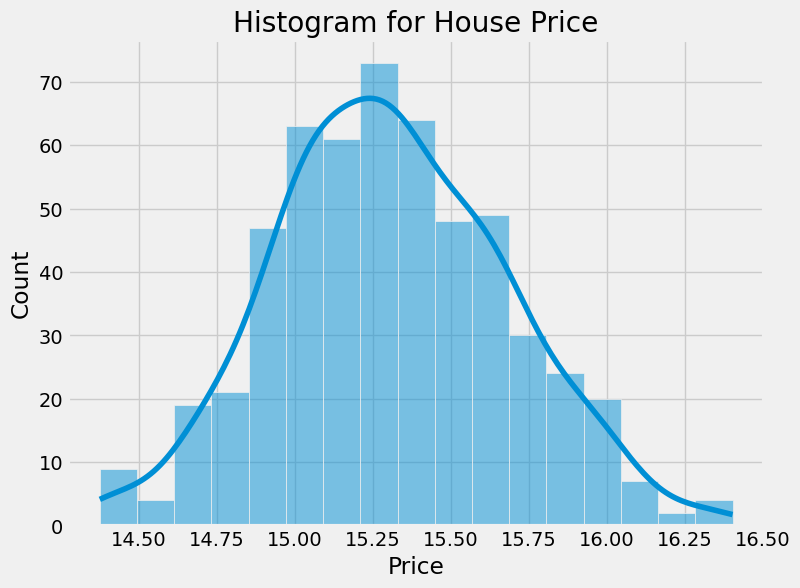

In [16]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')

sns.histplot(df['price'], kde=True)

plt.xlabel('Price')
plt.title('Histogram for House Price')
plt.show()


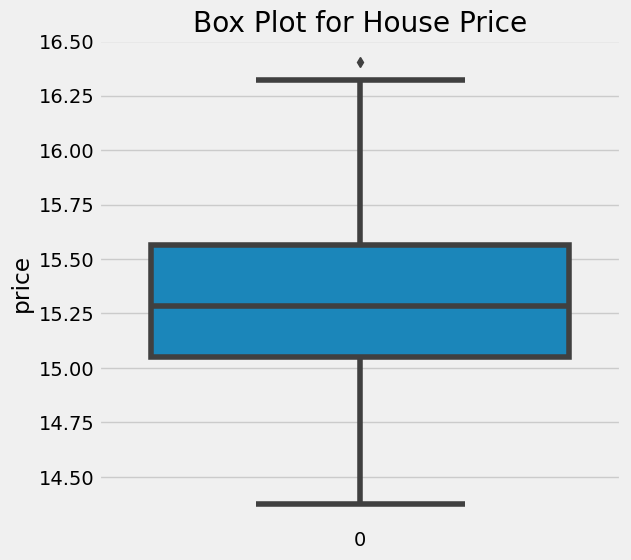

In [17]:
plt.figure(figsize=(6,6))
plt.style.use('fivethirtyeight')

sns.boxplot(df['price'])

plt.ylabel('price')
plt.title('Box Plot for House Price')
plt.show()

# Independent Variables (Numerical Features)

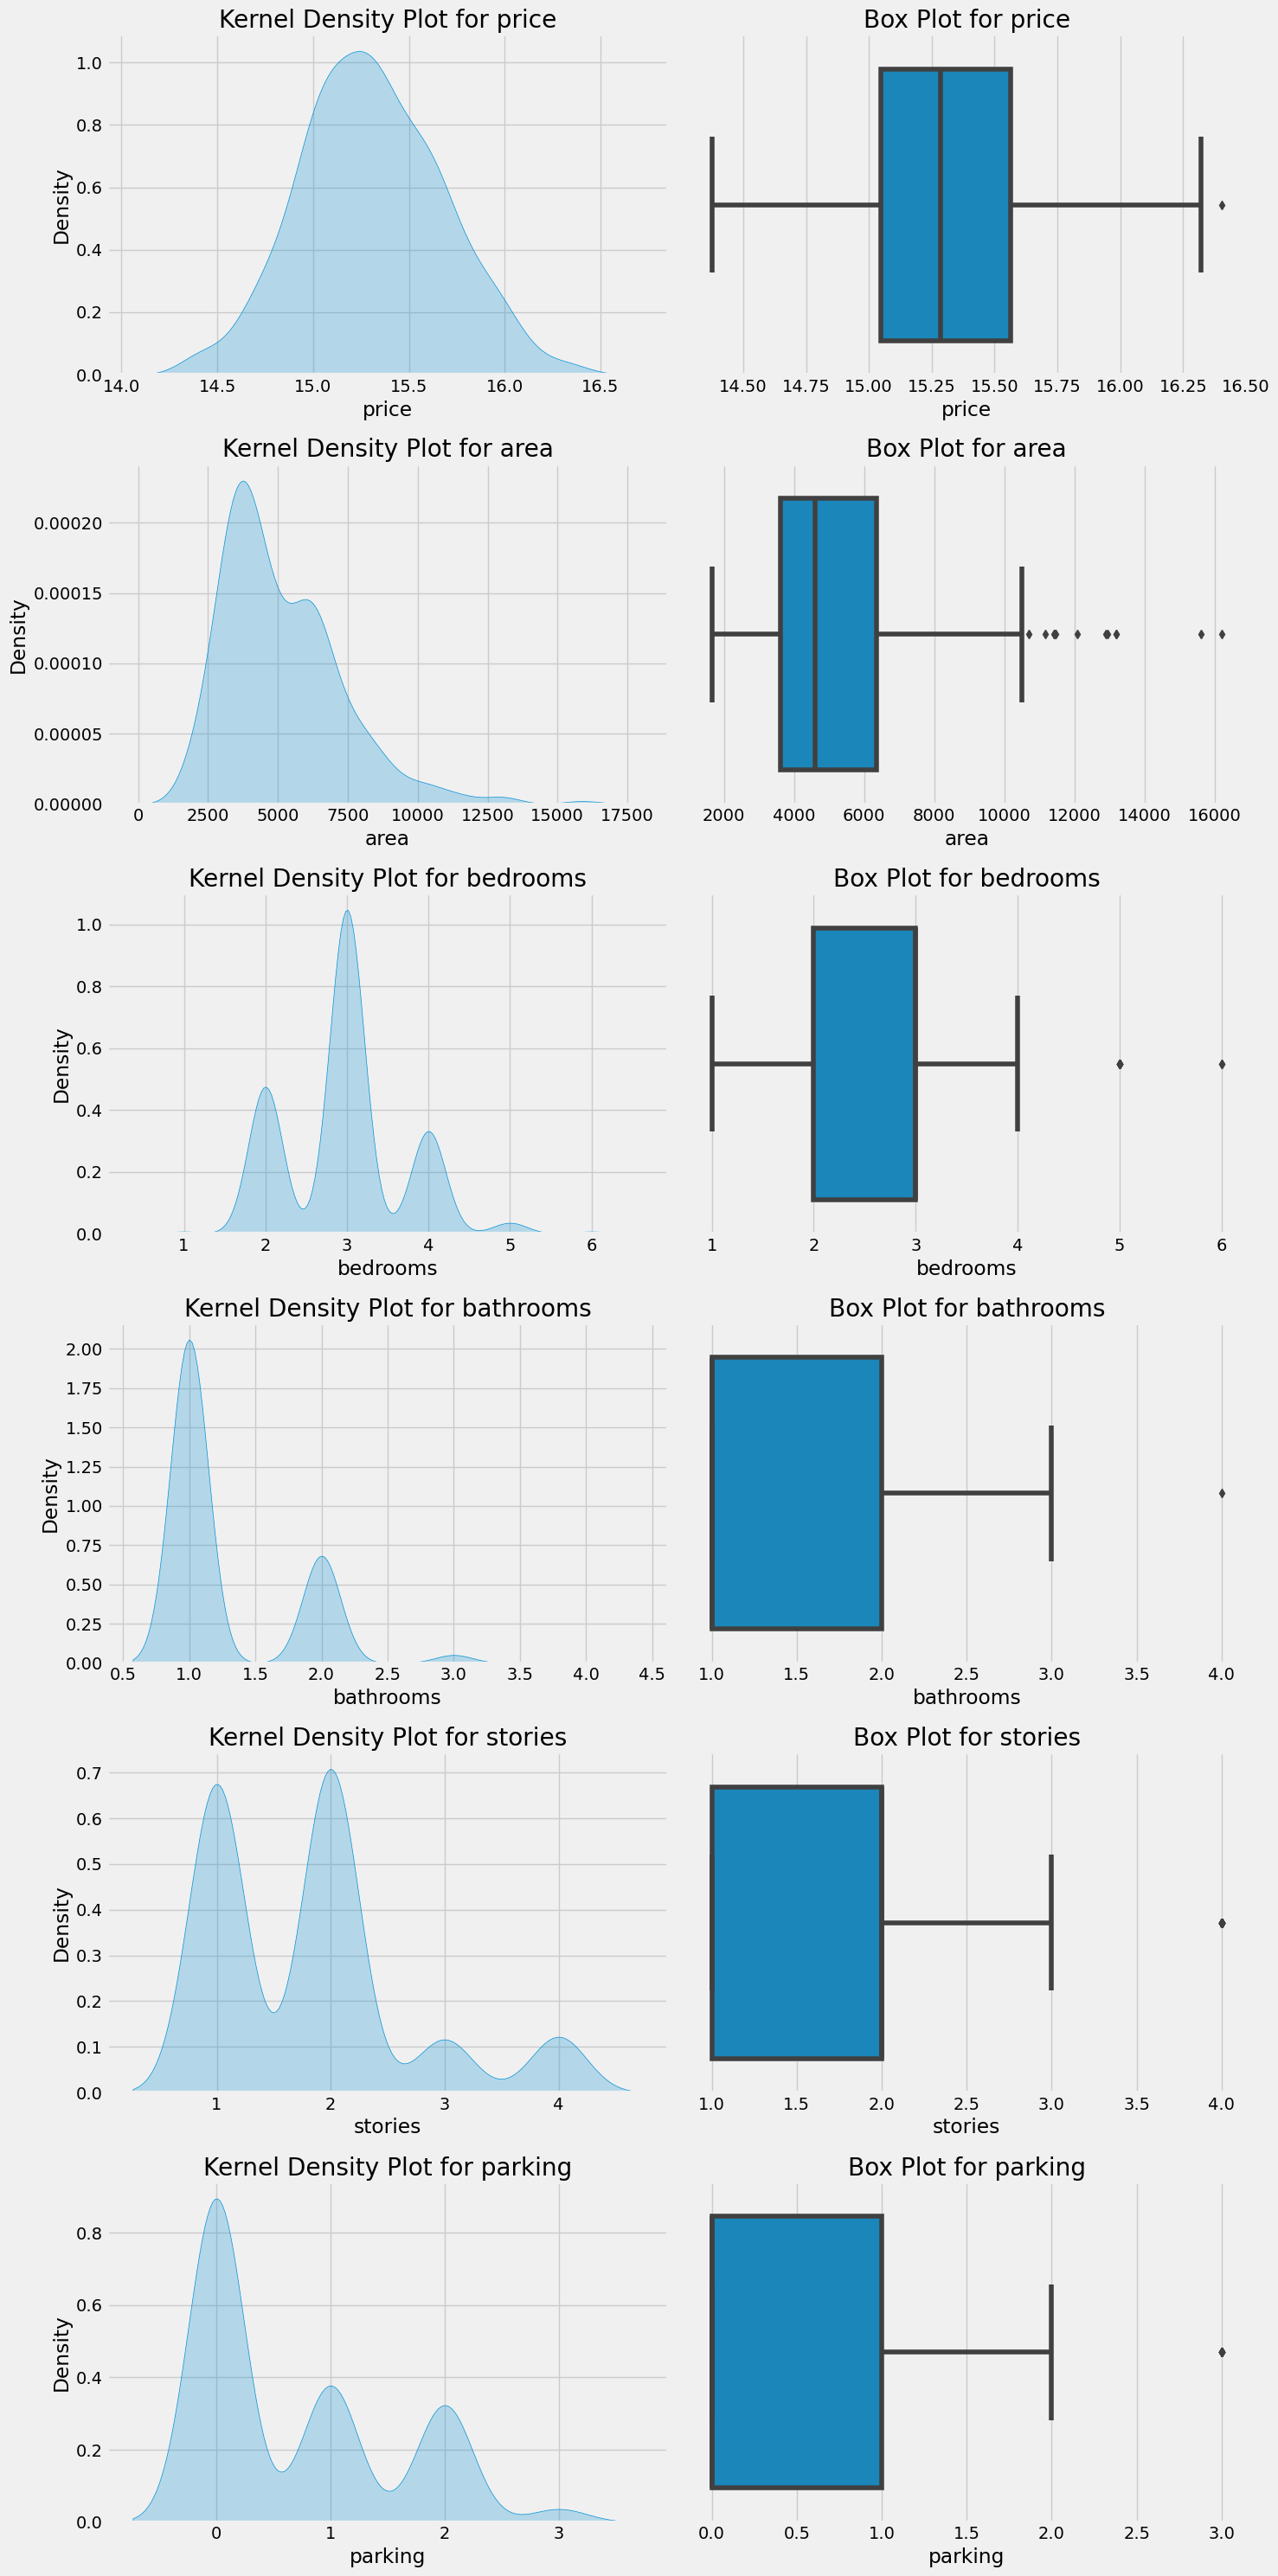

In [18]:
# Create subplots...

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 5 * len(numerical_columns)))

# Loop through each numerical column and plot...

for i, col in enumerate(numerical_columns):
    # Kernel Density Plot...
    sns.kdeplot(df[col], ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f'Kernel Density Plot for {col}')
    
    # Box Plot...
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot for {col}')

# Adjust layout...

plt.tight_layout()
plt.show()


# Independent Variables (Categorical Features)

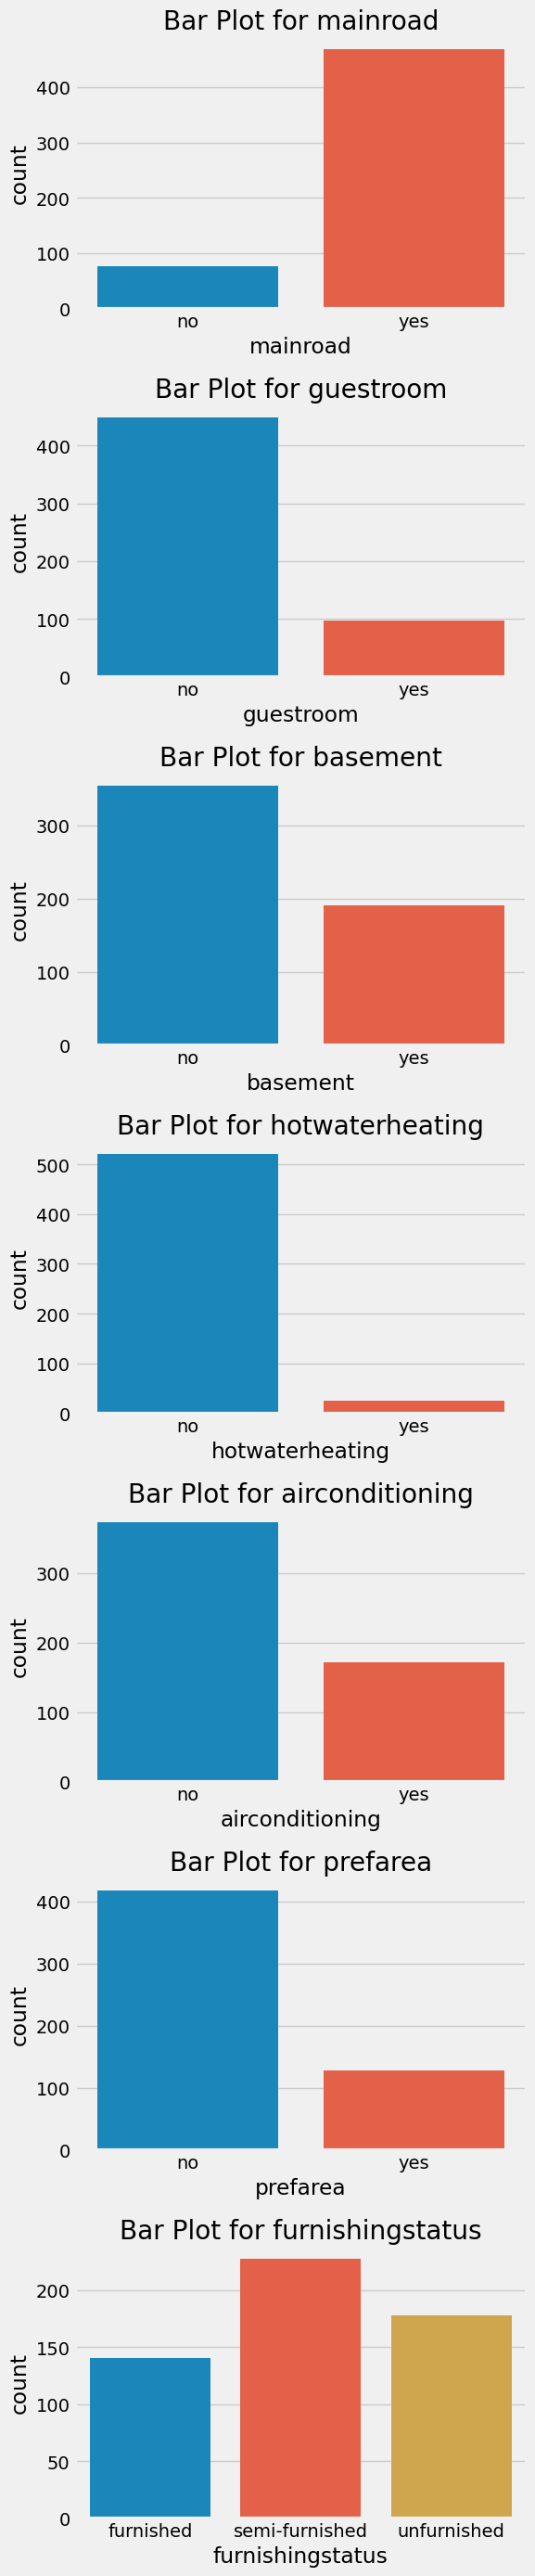

In [19]:
# Create subplots for categorical columns...

fig_cat, axes_cat = plt.subplots(len(categorical_columns), 1, figsize=(6, 4 * len(categorical_columns)))

# Loop through each categorical column and plot...

for i, col in enumerate(categorical_columns):
    # Bar Plot...
    sns.countplot(x=df[col], ax=axes_cat[i])
    axes_cat[i].set_title(f'Bar Plot for {col}')

# Adjust layout for categorical columns...

plt.tight_layout()
plt.show()

# Bivariate Analysis

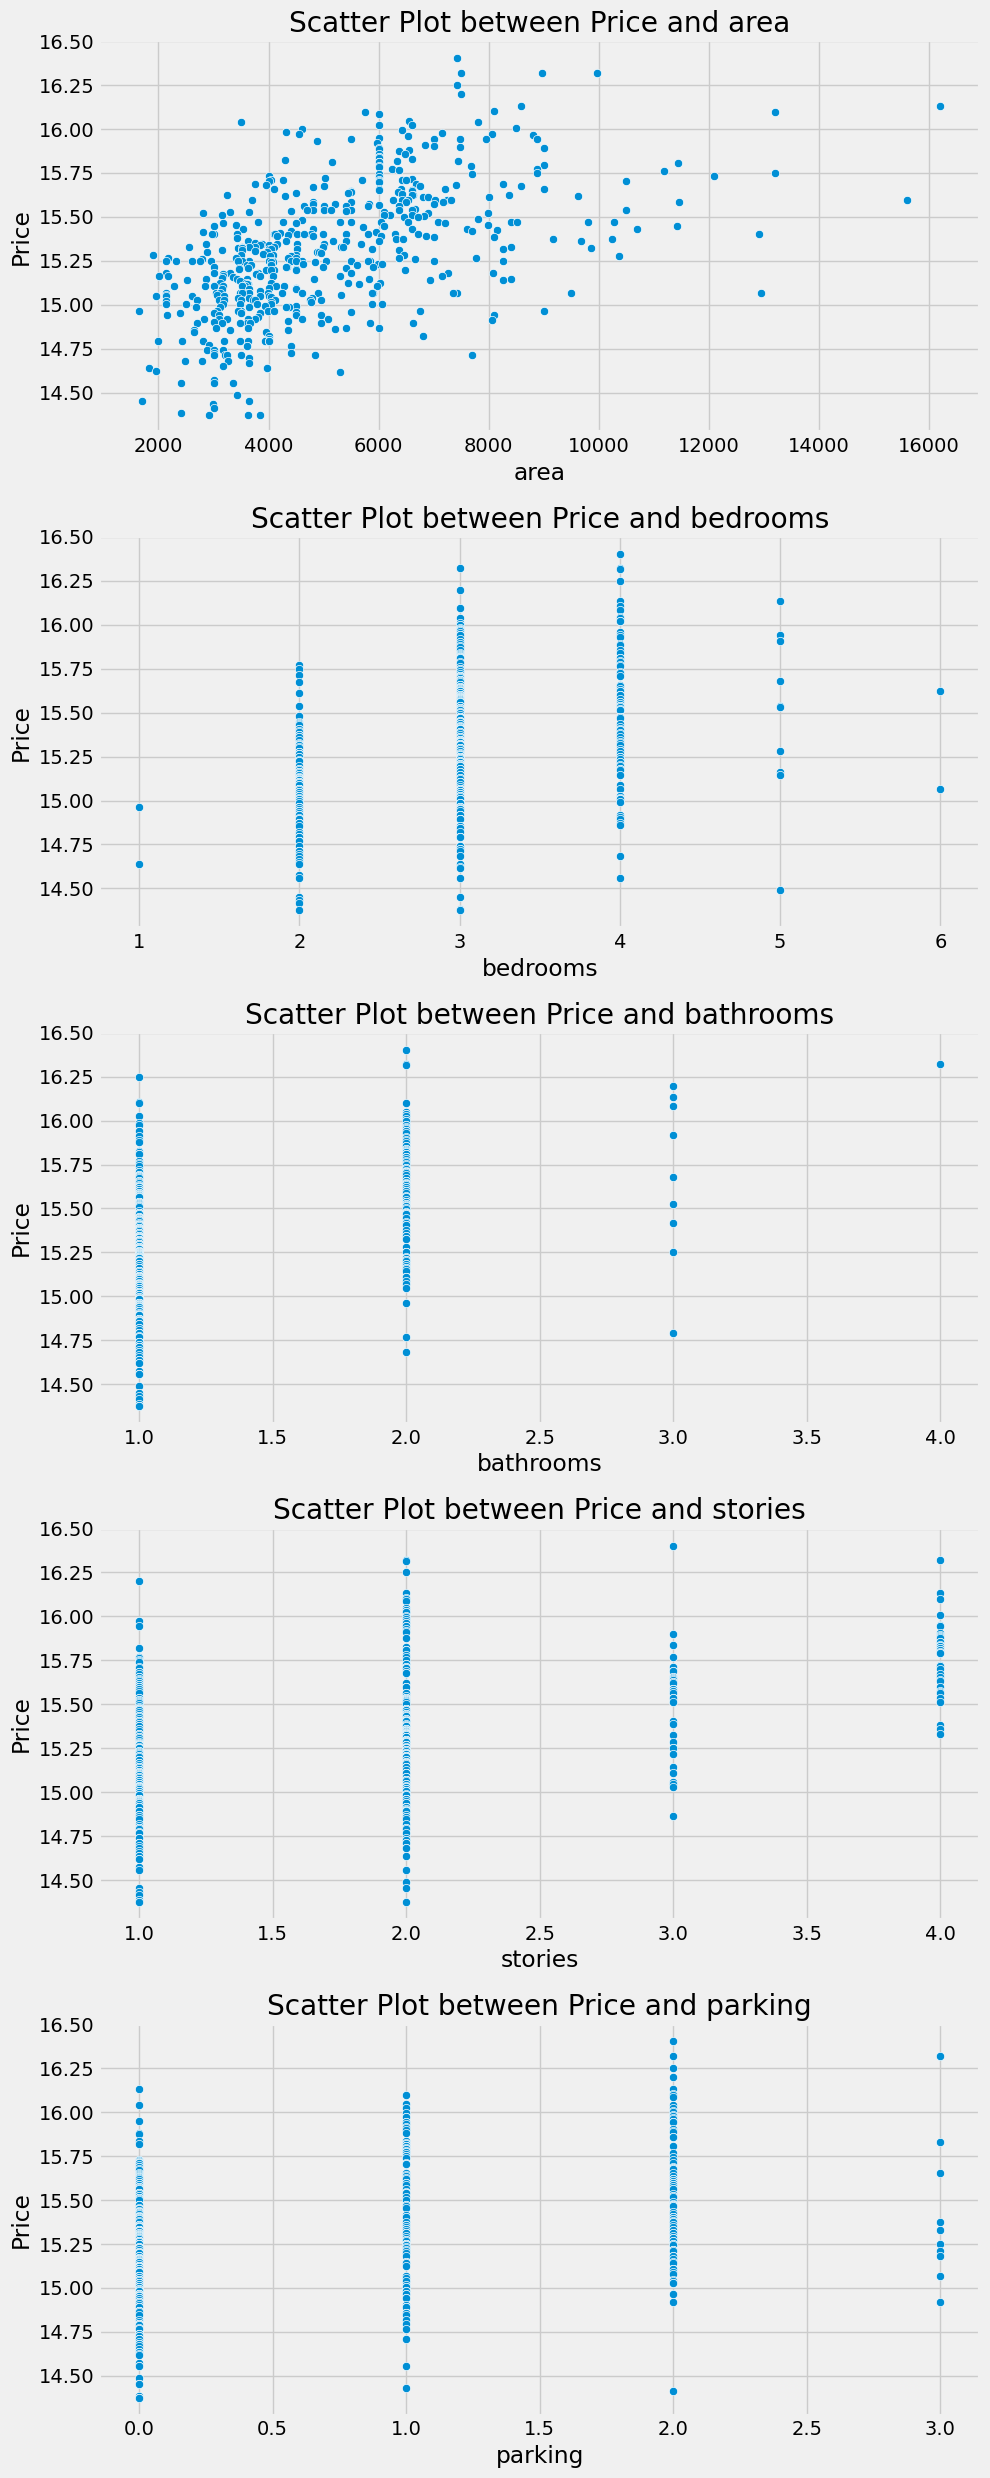

In [20]:
# Create a copy of numerical columns list excluding the target variable 'price'...

numerical_columns_for_bivariate = numerical_columns.copy()
numerical_columns_for_bivariate.remove('price')

# Create subplots for scatter plots between 'price' and other numerical columns...

fig, axes = plt.subplots(len(numerical_columns_for_bivariate), 1, figsize=(10, 5 * len(numerical_columns_for_bivariate)))

# Loop through each numerical column and plot scatter plot...

for i, col in enumerate(numerical_columns_for_bivariate):
    # Scatter Plot...
    sns.scatterplot(x=df[col], y=df['price'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot between Price and {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

# Adjust layout for scatter plots...

plt.tight_layout()
plt.show()

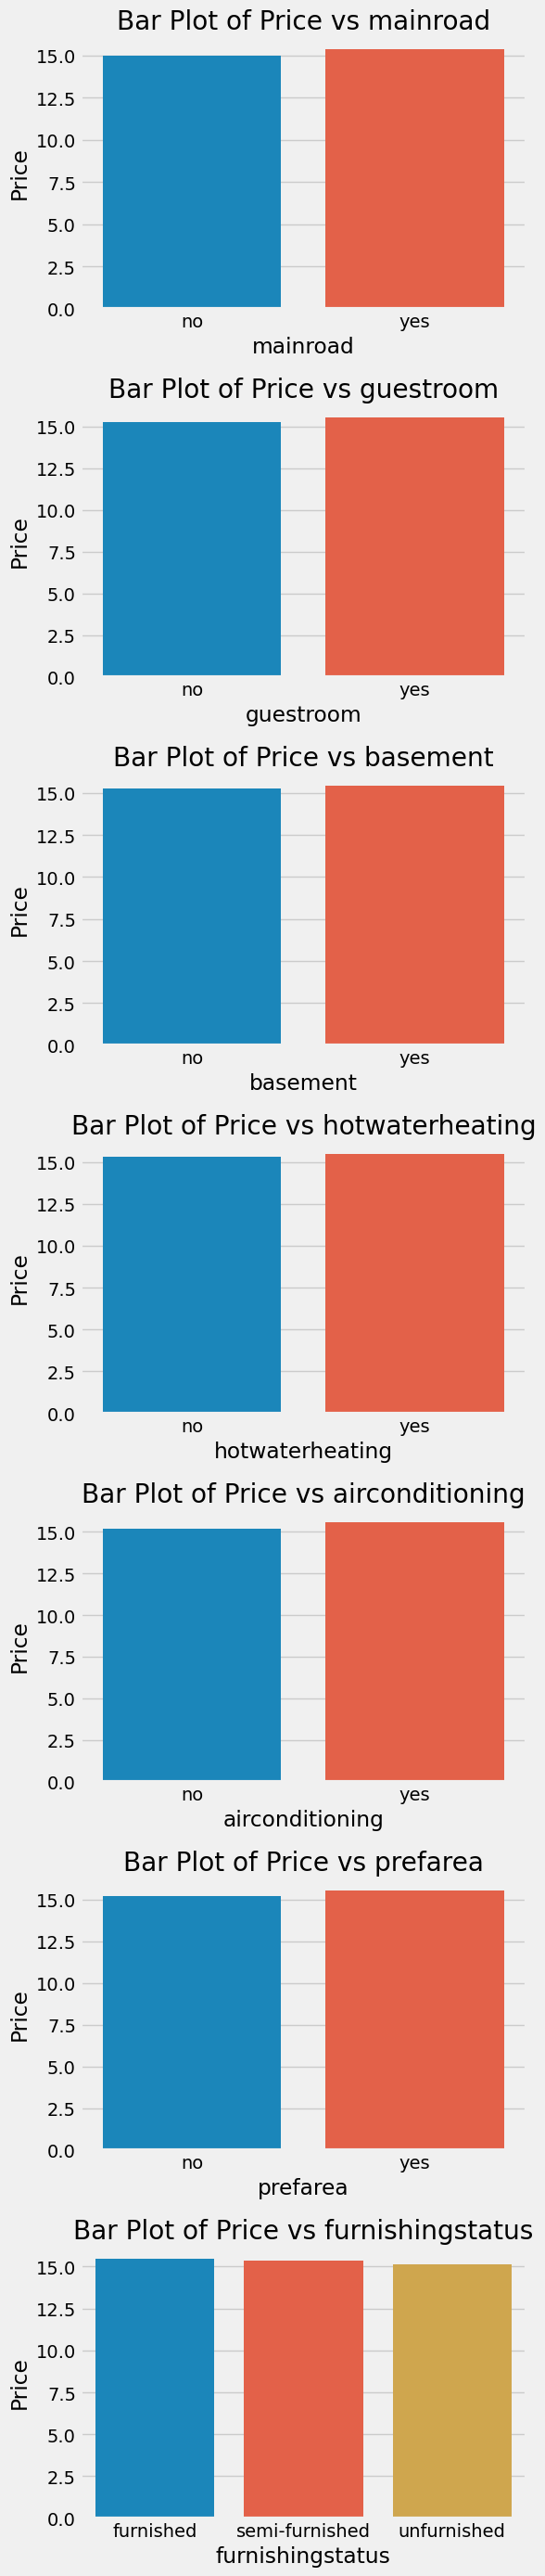

In [21]:
# Create subplots for bar plots between 'price' and other categorical columns...

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(6, 4 * len(categorical_columns)))

# Loop through each categorical column and plot bar plot...

for i, col in enumerate(categorical_columns):
    # Bar Plot...
    sns.barplot(x=df[col], y=df['price'], ax=axes[i], errorbar=None)
    axes[i].set_title(f'Bar Plot of Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

# Adjust layout for bar plots...

plt.tight_layout()
plt.show()


# Multivariate Analysis

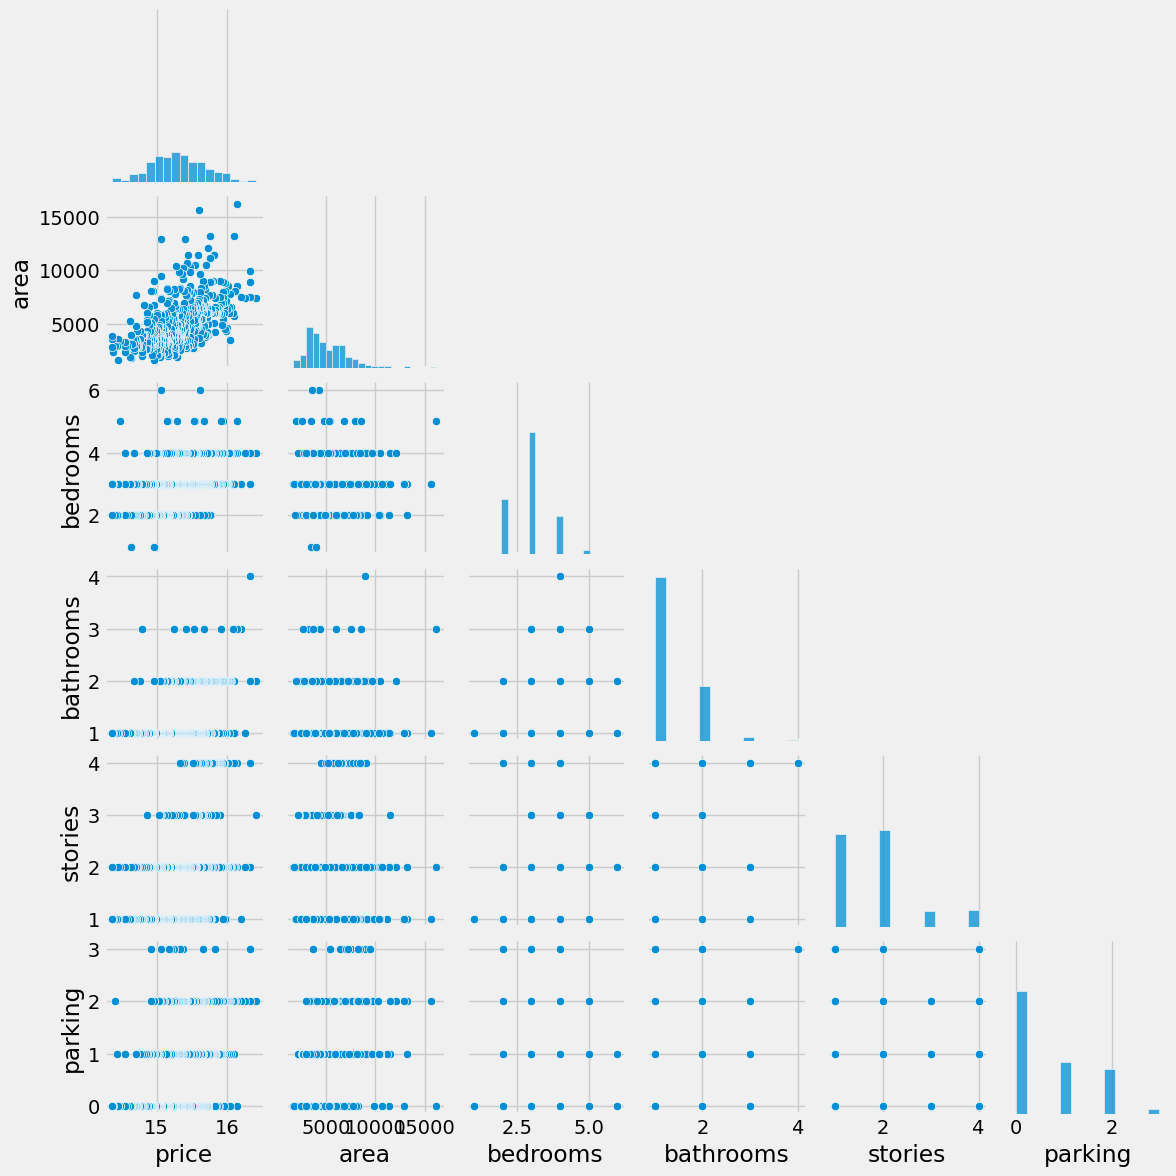

In [22]:
sns.pairplot(df, height=2,corner=True)
plt.show()

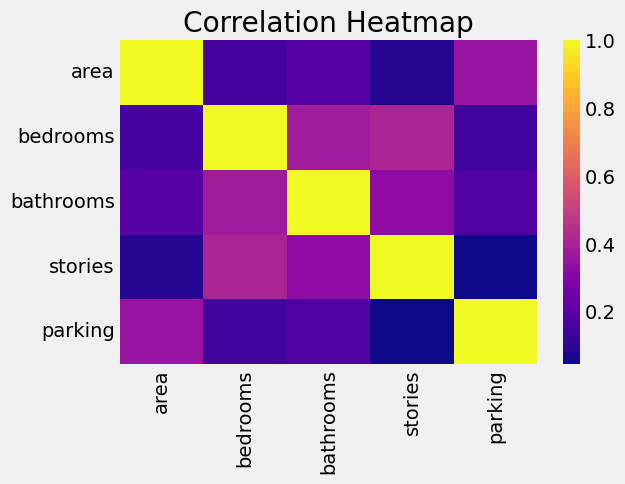

In [23]:
df_htmp = df.drop(columns=['price']).corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df_htmp, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

# Feature Transformation

In [24]:
# Apply Ordinal Encoder to 'furnishingstatus' column...

ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

In [25]:
# Columns to apply One-Hot Encoding...

columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply One-Hot Encoding...

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(df[columns_to_encode])

# Create a DataFrame with the encoded features...

encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original dataframe (dropping the encoded columns) with the new encoded dataframe...

df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_encoded)

         price  area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
0    16.403275  7420         4          2        3        2               2.0   
1    16.321037  8960         4          4        4        3               2.0   
2    16.321037  9960         3          2        2        2               1.0   
3    16.318175  7500         4          2        2        3               2.0   
4    16.250001  7420         4          1        2        2               2.0   
..         ...   ...       ...        ...      ...      ...               ...   
540  14.414348  3000         2          1        1        2               0.0   
541  14.384879  2400         3          1        1        0               1.0   
542  14.375127  3620         2          1        1        0               0.0   
543  14.375127  2910         3          1        1        0               2.0   
544  14.375127  3850         3          1        2        0               0.0   

     mainroad_yes  guestroo

# Split Input Matrix Feature and Target Feature

In [26]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train Test Split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Scaling

In [28]:
scaler = MinMaxScaler()

#Fit the scaler to the train set, it will learn the parameters...

scaler.fit(X_train)

#Transform train and test sets...

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Convert the scaled numpy arrays back into DataFrames and retain the original column names...

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Model

In [30]:
# Linear Regression...

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions...

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Evaluation

In [31]:
# Evaluation...

print("Linear Regression:")
print("Train RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))
print("Train R2:", r2_score(y_train, y_pred_train))
print("Test R2:", r2_score(y_test, y_pred_test))

Linear Regression:
Train RMSE: 0.20459974304605125
Test RMSE: 0.2195509735987876
Train R2: 0.6996001736934341
Test R2: 0.6370974048835887


# Saving the model

In [32]:
import pickle

# Save the trained model to a file using pickle...

filename = 'houseprice_lr_model.pkl'
pickle.dump(lr, open(filename, 'wb'))